In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data= pd.read_csv('train.csv')

test_data = pd.read_csv('test.csv')

display(train_data.head(3))
display(test_data.head(3))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [3]:
test_data.shape

(418, 11)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [6]:
train_data.describe()

print("\n\n")

test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


<hr><h4><b>Mising Data Inspection

In [7]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<hr><h4><b>Data Cleaning

In [9]:
# Drop irrelevant columns
test_data.drop(['PassengerId', 'Name', 'Ticket'], axis= 1, inplace= True)
train_data.drop(['PassengerId', 'Name', 'Ticket'], axis= 1, inplace= True)

In [10]:
# prepare the train data
num = train_data.select_dtypes(include = 'number')
cat = train_data.select_dtypes(exclude = 'number')

print(f'\t\tCategorical Data')
display(cat.head(3))
print(f'\n\n\t\tNumerical Data')
display(num.head(3))

		Categorical Data


,Sex,Cabin,Embarked
0,male,NaN,S
1,female,C85,C
2,female,NaN,S




		Numerical Data


,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250


In [13]:
# -----copy test data into a new variable
# prepare the test data
num_test = test_data.select_dtypes(include = 'number')
cat_test = test_data.select_dtypes(exclude = 'number')

print(f'\t\tCategorical Data')
display(cat_test.head(3))
print(f'\n\n\t\tNumerical Data')
display(num_test.head(3))

		Categorical Data


,Sex,Cabin,Embarked
0,male,NaN,Q
1,female,NaN,S
2,male,NaN,Q




		Numerical Data


,Pclass,Age,SibSp,Parch,Fare
0,3,34.5,0,0,7.8292
1,3,47.0,1,0,7.0000
2,2,62.0,0,0,9.6875


In [11]:
# -------data preprocessing to remove duplicates and null values
for i in train_data.columns:
   if (train_data[i].isnull().sum()/ len(train_data)) * 100 < 30:
        if i in num.columns:
            train_data[i].fillna(train_data[i].median(), inplace = True)
        else:
            train_data[i].fillna(train_data[i].mode()[0], inplace = True)
   else:
        train_data.drop(i, axis = 1, inplace = True)

train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [14]:
# -------data preprocessing to remove duplicates and null values
for i in test_data.columns:
   if (test_data[i].isnull().sum()/ len(test_data)) * 100 < 30:
        if i in num_test.columns:
            test_data[i].fillna(test_data[i].median(), inplace = True)
        else:
            test_data[i].fillna(test_data[i].mode()[0], inplace = True)
   else:
        test_data.drop(i, axis = 1, inplace = True)

test_data.isnull().sum()
        

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [15]:
# ---copy data to retain it values
train_dt = train_data.copy()
test_dt = test_data.copy()

In [16]:
features = ['Embarked', 'Sex']
print(train_dt[features].head(3))
print(test_dt[features].head(3))


  Embarked     Sex
0        S    male
1        C  female
2        S  female
  Embarked     Sex
0        Q    male
1        S  female
2        Q    male


In [17]:
test_dt['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [18]:
from sklearn.preprocessing import OrdinalEncoder


encoder = OrdinalEncoder()
train_dt[features] = encoder.fit_transform(train_dt[features])
test_dt[features] = encoder.transform(test_dt[features])


In [19]:
train_dt.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1.0,22.0,1,0,7.2500,2.0
1,1,1,0.0,38.0,1,0,71.2833,0.0
2,1,3,0.0,26.0,0,0,7.9250,2.0
3,1,1,0.0,35.0,1,0,53.1000,2.0
4,0,3,1.0,35.0,0,0,8.0500,2.0


In [20]:
from sklearn.preprocessing import StandardScaler

def normalize_data(data):
    scaler = StandardScaler()

    for i in range(len(data)):
        # apply scaling to the whole data and update the original dataframe
        data[i][:] = scaler.fit_transform(data[i])

    return data

data = normalize_data([train_dt, test_dt])

In [21]:
train_dt.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,-0.789272,0.827377,0.737695,-0.565736,0.432793,-0.473674,-0.502445,0.585954
1,1.266990,-1.566107,-1.355574,0.663861,0.432793,-0.473674,0.786845,-1.942303
2,1.266990,0.827377,-1.355574,-0.258337,-0.474545,-0.473674,-0.488854,0.585954
3,1.266990,-1.566107,-1.355574,0.433312,0.432793,-0.473674,0.420730,0.585954
4,-0.789272,0.827377,0.737695,0.433312,-0.474545,-0.473674,-0.486337,0.585954


In [47]:
# split features into train and test data
X= train_dt.drop(columns= 'Survived')
y= train_dt['Survived'].astype(int)

from sklearn.model_selection import train_test_split

# split the data into train and test data
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size= 0.2,
                                                 train_size=0.8, random_state=42)

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, KFold

# ----create a list of classifiers
classifiers = [RandomForestClassifier, SVC, XGBClassifier]

# ----creat a list for THE THREE classiiers names
classifier_name = ['RandomForestClassifier', 'XGBClassifier', 'SVC']

# ----create a list for the classifier scores
class_scores = []

# creat a loop over each classifier and cross val score
for classifier, name in zip(classifiers, classifier_name):
    kfold = KFold(n_splits= 10, random_state= 42, shuffle= True)
    model = classifier()
    cv_score = cross_val_score(model, X, y, cv=kfold, scoring= 'accuracy')
    class_scores.append(cv_score.mean())

# ---create a dataframe for classifiers and their scores
classifier_dt = pd.DataFrame({'Classifier': classifier_name, 'Score': class_scores})
classifier_dt



,Classifier,Score
0,RandomForestClassifier,0.817041
1,XGBClassifier,0.819301
2,SVC,0.821536


In [49]:
from sklearn.model_selection import GridSearchCV

# Initialize XGBoost classifier
xgb = XGBClassifier()

# Define a parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300, 500, 1000],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.05, 0.001]
}

# Initialize GridSearchCV with XGBoost classifier and parameter grid
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(xtrain, ytrain)

# Print the best parameters found
print("Best parameters:", grid_search.best_params_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
accuracy = best_model.score(xtest, ytest)
print("Accuracy on test set:", accuracy)

Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
Accuracy on test set: 0.8100558659217877


In [50]:
best_model.score(X, y)

0.856341189674523

In [51]:
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importances

,Feature,Importance
1,Sex,0.561280
0,Pclass,0.191216
3,SibSp,0.073246
2,Age,0.052473
6,Embarked,0.050498
5,Fare,0.050075
4,Parch,0.021210


In [31]:
# %pip install my_custom_module

Note: you may need to restart the kernel to use updated packages.Collecting my_custom_module
  Obtaining dependency information for my_custom_module from https://files.pythonhosted.org/packages/2b/6d/9899fdae5c5cf0f9db679eefcb3db817978c8104c878441d17d75d2f4597/my_custom_module-0.1-py3-none-any.whl.metadata




[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


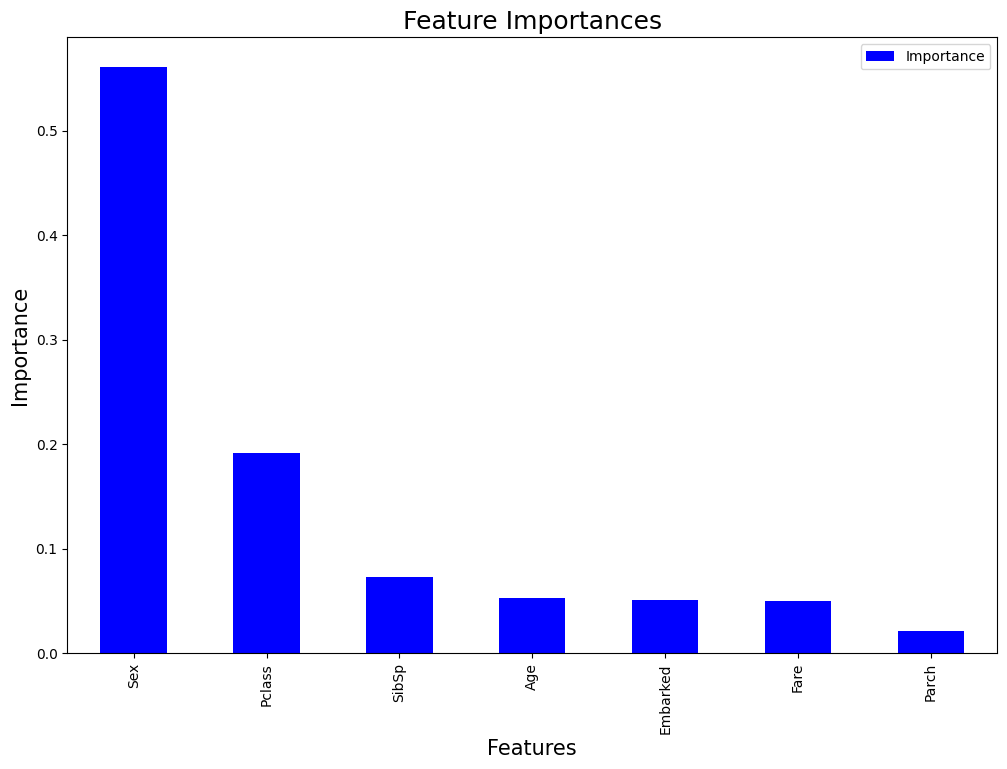

In [52]:
feature_importances.plot(kind='bar', x='Feature', y='Importance', color='blue'  ,figsize=(12, 8))
plt.title('Feature Importances', size=18)
plt.xlabel('Features', size=15)
plt.ylabel('Importance', size=15)
plt.show()

In [53]:
# Evaluate the model on the test set and generate all classification metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Make predictions on the test set
y_pred = best_model.predict(xtest)

# Generate the classification report
report = classification_report(ytest, y_pred)  # Renamed variable to avoid conflict

# Generate the confusion matrix
matrix = confusion_matrix(ytest, y_pred)  # Renamed variable to avoid conflict

# Generate the accuracy score
accuracy = accuracy_score(ytest, y_pred)  # Renamed variable to avoid conflict

print(f"Classification Report:\n{report}\n")
print(f"Confusion Matrix:\n{matrix}\n")
print(f"Accuracy Score: {accuracy}\n")

# Make predictions on the test set (assuming test_ds is prepared correctly)
test_predictions = best_model.predict(test_dt)
# Now you can use test_predictions for further analysis or export

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179


Confusion Matrix:
[[93 12]
 [22 52]]

Accuracy Score: 0.8100558659217877



In [54]:
# checking the percentage of the male and female survuvors respectively
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of women who survived: 0.7420382165605095
% of men who survived: 0.18890814558058924


In [55]:
test_check = pd.read_csv('test.csv')

In [56]:
output = pd.DataFrame({'PassengerId': test_check.PassengerId, 'Survived': test_predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [57]:
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [58]:
output['Survived'].value_counts()

Survived
0    275
1    143
Name: count, dtype: int64